In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Boston House Prices/boston.csv')

In [5]:
df.sample(12)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
249,0.19073,22.0,5.86,0,0.4310,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,26.2
37,0.08014,0.0,5.96,0,0.4990,5.850,41.5,3.9342,5,279.0,19.2,396.90,8.77,21.0
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252.0,18.3,395.62,1.98,34.9
346,0.06162,0.0,4.39,0,0.4420,5.898,52.3,8.0136,3,352.0,18.8,364.61,12.67,17.2
326,0.30347,0.0,7.38,0,0.4930,6.312,28.9,5.4159,5,287.0,19.6,396.90,6.15,23.0
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224.0,20.2,389.71,5.68,22.2
408,7.40389,0.0,18.10,0,0.5970,5.617,97.9,1.4547,24,666.0,20.2,314.64,26.40,17.2
386,24.39380,0.0,18.10,0,0.7000,4.652,100.0,1.4672,24,666.0,20.2,396.90,28.28,10.5
377,9.82349,0.0,18.10,0,0.6710,6.794,98.8,1.3580,24,666.0,20.2,396.90,21.24,13.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [17]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

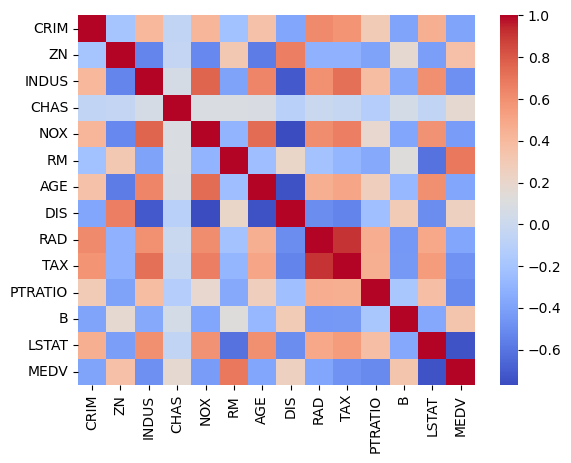

In [19]:
sns.heatmap(correlation_matrix, cmap ='coolwarm')

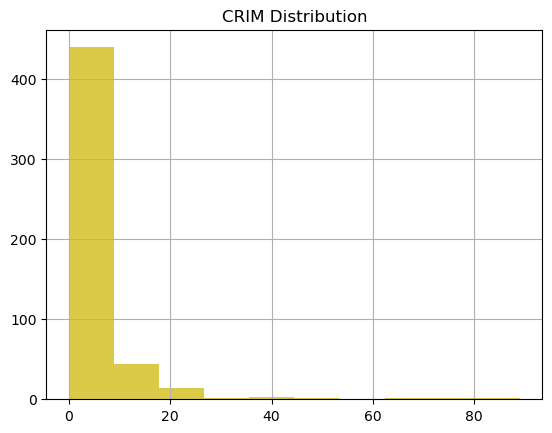

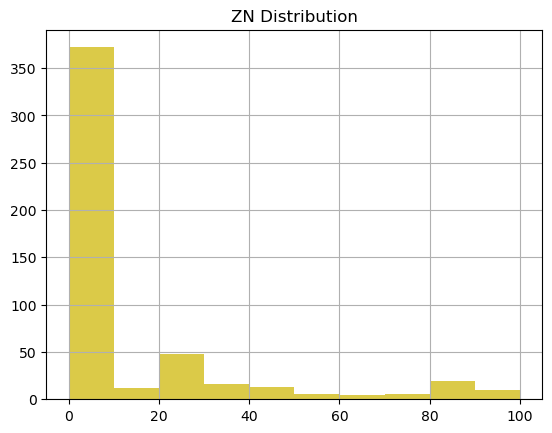

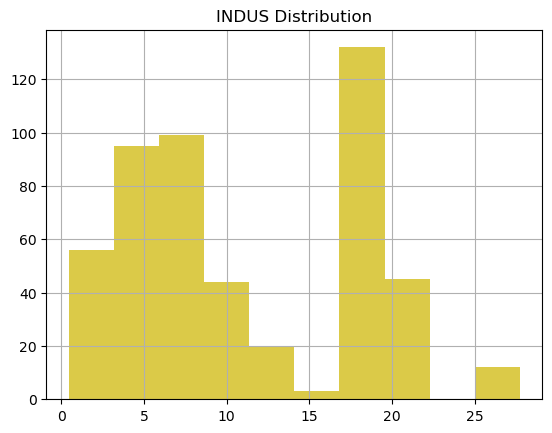

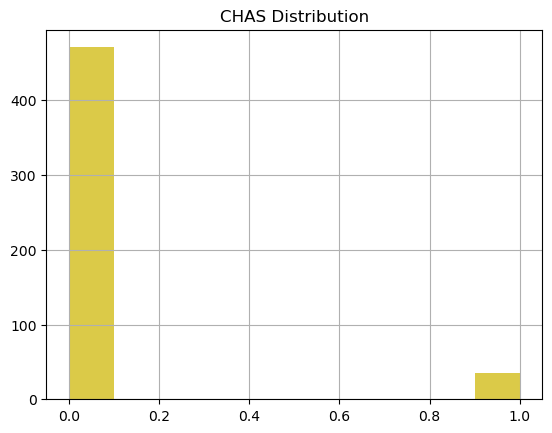

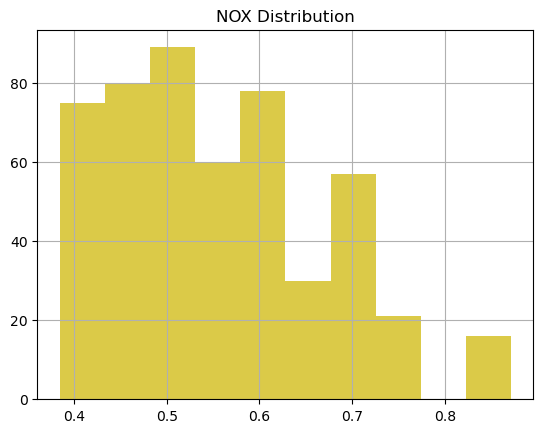

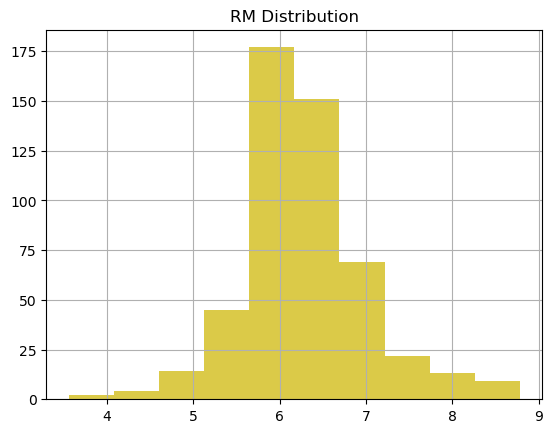

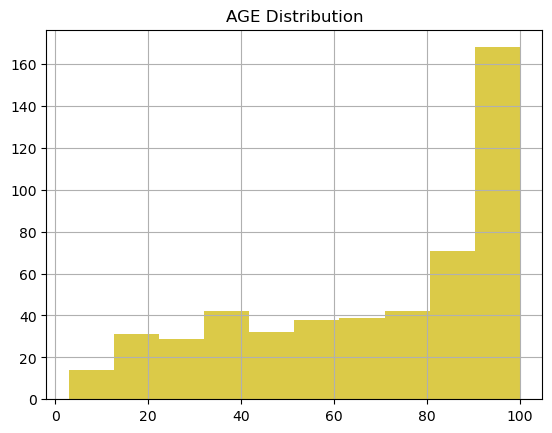

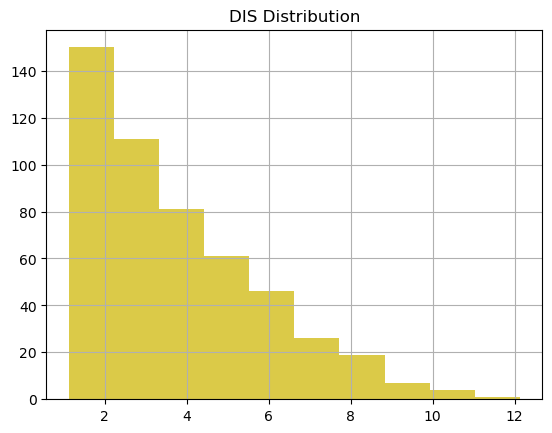

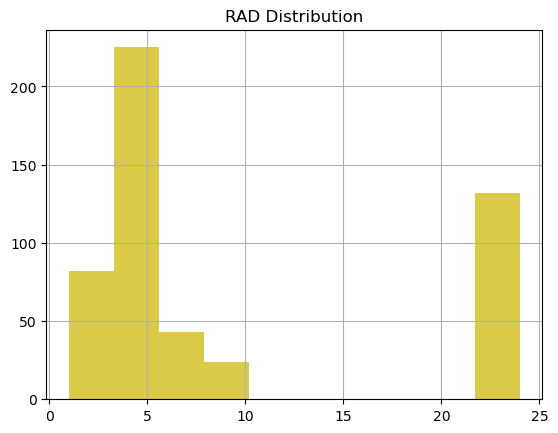

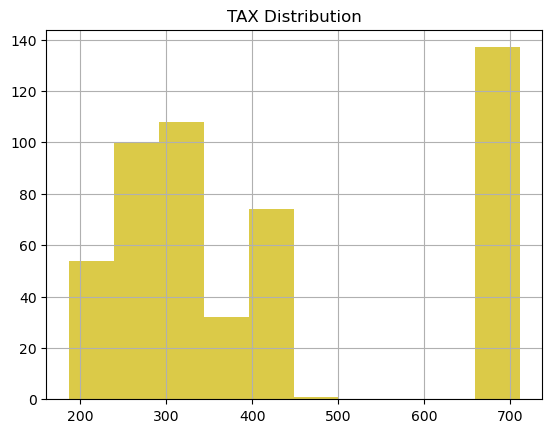

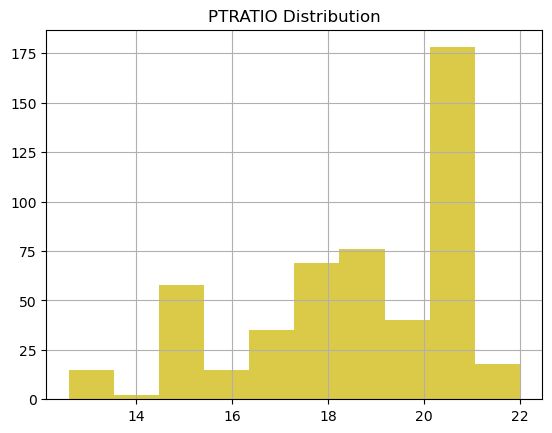

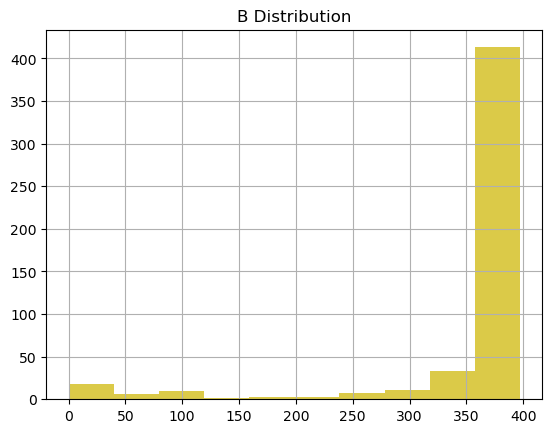

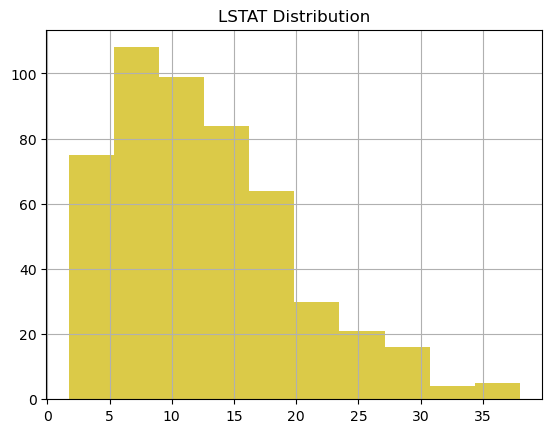

In [21]:
for column in df.columns[:-1]:
    df[column].hist(grid=True, color='#dbca48')
    plt.title(f'{column} Distribution')
    plt.show()


C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


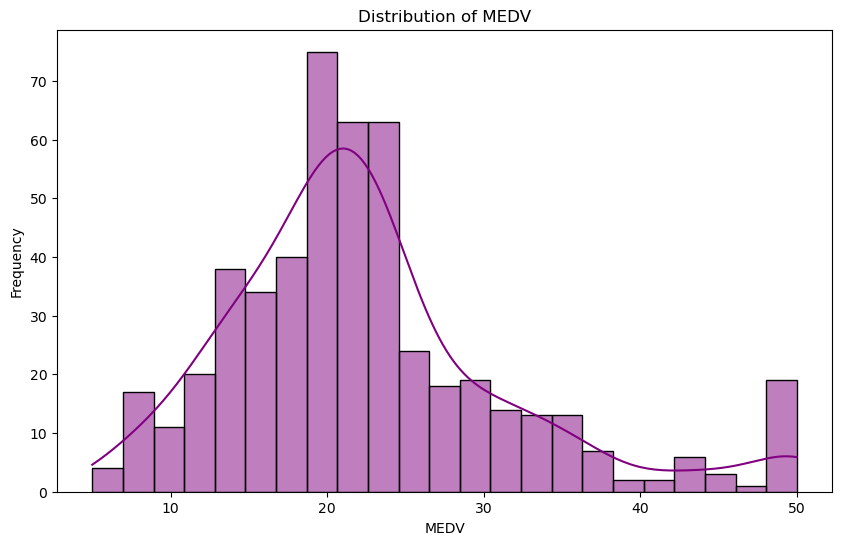

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['MEDV'], kde= True, color = 'purple')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

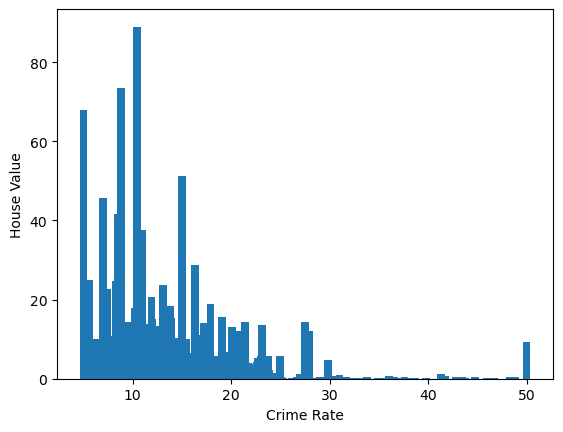

In [39]:
plt.bar(df['MEDV'], df['CRIM'])
plt.xlabel('Crime Rate')
plt.ylabel('House Value')
plt.show()

In [25]:
#Stacking

In [27]:
x = df.drop(columns='MEDV', axis=1)
y = df['MEDV']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [31]:
base_models = [
    ('dt', DecisionTreeRegressor()),
    ('knn', KNeighborsRegressor()),
    ('svr', SVR())
]

meta_model = LinearRegression()

In [33]:
stacking_regressor = StackingRegressor(estimators=base_models,final_estimator=meta_model)

In [35]:
stacking_regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('knn', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression())

In [37]:
y_pred = stacking_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.0864005411542053
